In [1]:
# import libraries
import pandas as pd
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score, KFold
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [2]:
# Read the data from excel using Pandas and assign features to X and efficiency to y.
df = pd.read_excel('C:/Anaconda3/projects/oled/oled.xlsx', sheetname='extend_side')
df.dropna(axis=0, inplace=True)

X = df[list(df.columns)[1:-2]]
y = df[['cd/A']]

# preprocessing/scaling data/ standardization
X = preprocessing.minmax_scale(X)
y = preprocessing.minmax_scale(y)

In [18]:
# prepare models. here I used the model right away using the default parameter
regressor = []
# regressor.append(('LR', LinearRegression(fit_intercept=True, normalize=False, copy_X=True, n_jobs=-1)))
regressor.append(('LASS', Lasso(alpha=0.01)))
regressor.append(('RIDG', Ridge(fit_intercept=True, alpha=0.1)))
regressor.append(('GRB', GradientBoostingRegressor()))
regressor.append(('SVR', SVR(kernel='rbf')))
regressor.append(('KNN', KNeighborsRegressor()))
regressor.append(('DTR', DecisionTreeRegressor()))
regressor.append(('RFR', RandomForestRegressor()))

# evaluate each model in turn
results = []
names = []

# Calculate the r-squared for every algorithm (mean score of cross validated data)
for name, reg in regressor:
    kfold = KFold(n_splits=5, random_state=2)
    cv_results = cross_val_score(reg, X, y.ravel(), cv=kfold)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LASS: -0.763429 (0.780868)
RIDG: -1.980874 (2.789198)
GRB: -0.161158 (0.658490)
SVR: -0.730834 (0.754829)
KNN: -0.665779 (1.169970)
DTR: -0.803199 (1.478900)
RFR: -0.190511 (0.698394)


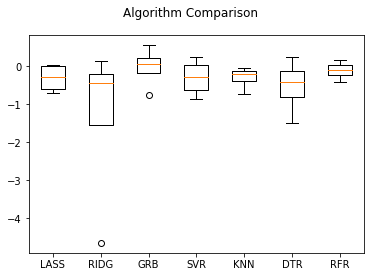

In [4]:
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [10]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=7)

regressor = RandomForestRegressor(random_state=2)
regressor.fit(X_train, y_train.ravel())
y_predictions = regressor.predict(X_test)

# Check how our model is doing
print('R-squared: ', regressor.score(X_test, y_test))
print('MS Error: ', mean_squared_error(y_test, y_predictions))

R-squared:  0.783039139528
MS Error:  0.011280911903


In [14]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=4, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.51177478  0.72291621  0.52611334  0.6410401 ]
mean score:  0.60046110853


In [16]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, shuffle=True, random_state=2)
scores = cross_val_score(regressor, X, y.ravel(), cv=kfold)
print('scores: ', scores)
print('mean score: ', scores.mean())

scores:  [ 0.69950191  0.45297735  0.70414993  0.63925064  0.68012741  0.29619859
  0.28290099  0.70969624  0.69031113  0.71770582]
mean score:  0.587282001318
